In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import open3d as o3d
from open3d import JVisualizer

In [5]:
img_list = glob('/home/wangph/SPADE/datasets/coco_stuff/train_img/*.jpg')
img_list.sort()
print(img_list)
depth_lst = glob('/home/wangph/SPADE/datasets/coco_stuff/train_depth/*.jpeg')
depth_lst.sort()
print(depth_lst)

['/home/wangph/SPADE/datasets/coco_stuff/train_img/000000017914.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000029286.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000138805.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000184101.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000197384.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000203744.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000284465.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000350505.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000371376.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000426773.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000475177.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000500044.jpg', '/home/wangph/SPADE/datasets/coco_stuff/train_img/000000580986.jpg']
['/home/wangph/SPADE/datasets/coco_stuff/train_depth/000000017914_disp.jpeg', '/home/wangph/SPADE/data

In [8]:
rnd_idx = 0
img = o3d.io.read_image(img_list[rnd_idx])
depth = o3d.io.read_image(depth_lst[rnd_idx])
# print(type(img))
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(img, depth)
print(rgbd)

RGBDImage of size 
Color image : 500x375, with 1 channels.
Depth image : 500x375, with 1 channels.
Use numpy.asarray to access buffer data.


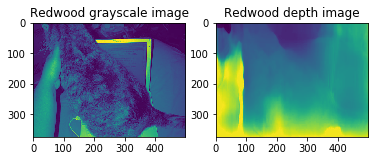

In [9]:
# vis rgb and d.Note rgb is converted to grayscale 
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd.depth)
plt.show()

In [17]:
# point cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
# print(pcd)
# o3d.visualization.draw_geometries([pcd])
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()

JVisualizer with 1 geometries